### Lorenz Model
$$x'(t) = \sigma(y - x)\\
    y'(t) = rx - y - xz\\
    z'(t) = xy -bz$$
    
  Where $\sigma,r,b$ are model parameters

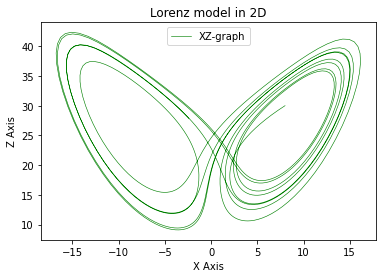

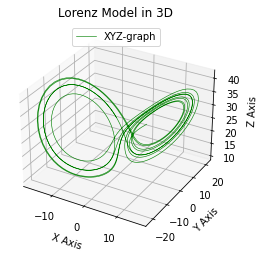

In [35]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

sigma, r, b = 10,28,2.667
x0, y0, z0 = 8, 0, 30

tmax, n = 10, 1000

def model(t, W, sigma, r, b):
    x, y, z = W
    dx = sigma*(y - x)
    dy = r*x - y - x*z
    dz = x*y -b*z
    return dx, dy, dz

soln = solve_ivp(model, (0, tmax), (x0, y0, z0), args=(sigma, r, b),
                 dense_output=True)

t = np.linspace(0, tmax, n)
u, v, w = soln.sol(t)

plt.plot(u,w, color='g', lw=0.6,label="XZ-graph")
plt.title('Lorenz model in 2D')
plt.xlabel('X Axis')
plt.ylabel('Z Axis')
plt.legend(loc='upper center')
plt.show()
ax = plt.figure().add_subplot(projection='3d')
ax.plot(u, v, w, lw=0.6,color="g",label="XYZ-graph")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Model in 3D")
plt.legend(loc="upper center")
plt.show()

### 4 Stage runge-kutta
4-Stage Runge-Kutta Method for system of ODES of the form 
$$ x'=f(t,x), \quad x(t_0)=x_0 $$

In [10]:
## Lorenz model
def model(w,t,v=[10,28,8/3]):
    sigma,r,b=v
    x, y, z=w
    dx = sigma*(y - x)
    dy = r*x - y - x*z
    dz = x*y - b*z
    return np.array([dx, dy, dz])
## Rungekutta lorenz model
def rungekutta(f, x0, t):
    h = t[1] - t[0]
    N = t.shape[0]
    M = x0.shape[0]
    x = np.zeros((N,M))
    x[0] = x0
    for i in range(0,N - 1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + k1 * (h/ 2), t[i] + h / 2)
        k3 = f(x[i] + k2 * h/ 2, t[i] + h / 2)
        k4 = f(x[i] + k3 * h, t[i] + h)
        x[i+1] = x[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return x
sigma=10
r=28
a=0
N=1000
b=20
t=np.linspace(a,b,N)
init=np.array([8,0,30])
result=rungekutta(model,init, t)

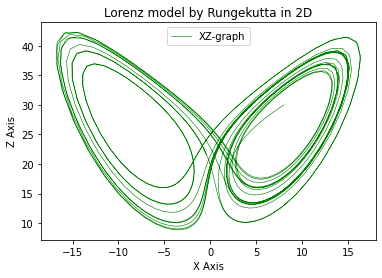

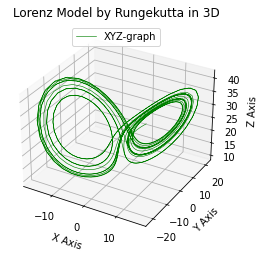

In [30]:
### Ploting of the model result in 2D
#plt.subplot(1,2,1)
plt.plot(result[:,0],result[:,2], 'g', lw=0.6,label="XZ-graph")
plt.title('Lorenz model by Rungekutta in 2D')
plt.xlabel('X Axis')
plt.ylabel('Z Axis')
plt.legend(loc='upper center')
plt.show()
#plt.subplot(1,2,2)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(result[:,0], result[:,1], result[:,2], lw=0.6,color="g",label="XYZ-graph")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Model by Rungekutta in 3D")
plt.legend(loc='upper center')
plt.show;